# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\torre\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEW_API_KEY")

In [5]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key = api_key)

In [6]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(
    q = "bitcoin", language = "en", sort_by = "relevancy")


In [7]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(
    q = "ethereum", language = "en", sort_by = "relevancy")

In [8]:
# Create the Bitcoin sentiment scores DataFrame
sentiments = []

for articles in btc_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
btc  = pd.DataFrame(sentiments)
btc.head()

,text,Compound,Positive,Negative,Neutral
0,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.061,0.882
1,Its set to open later this year\r\nIf you buy ...,-0.4404,0.000,0.081,0.919
2,Wikipedia editors have voted in favor of dropp...,0.4019,0.088,0.000,0.912
3,Warren Buffett has always been a bitcoin skept...,-0.3269,0.085,0.143,0.772
4,"You might have heard of crypto Twitter, the co...",-0.2732,0.000,0.057,0.943


In [9]:
# Create the Ethereum sentiment scores DataFrame
sentiments = []

for articles in eth_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
eth  = pd.DataFrame(sentiments)
eth.head()

,text,Compound,Positive,Negative,Neutral
0,The US Department of Treasury says Lazarus is ...,-0.7845,0.088,0.231,0.681
1,"18 with 15 posters participating, including st...",0.1027,0.084,0.071,0.844
2,"Opera launched its dedicated ""Crypto Browser"" ...",0.7351,0.188,0.000,0.812
3,A multi-billion dollar cryptocurrency company ...,-0.2263,0.046,0.075,0.879
4,When Bored Ape Yacht Club creators Yuga Labs a...,-0.2732,0.000,0.055,0.945


In [10]:
# Describe the Bitcoin Sentiment
btc.describe()

,Compound,Positive,Negative,Neutral
count,20.00000,20.000000,20.000000,20.000000
mean,0.04959,0.068500,0.051100,0.880350
std,0.41736,0.068593,0.042733,0.064537
min,-0.54230,0.000000,0.000000,0.772000
25%,-0.27320,0.000000,0.000000,0.831500
50%,-0.02580,0.062000,0.063000,0.892000
75%,0.40070,0.085750,0.078750,0.925750
max,0.75060,0.197000,0.143000,1.000000


In [11]:
# Describe the Ethereum Sentiment
eth.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.00000
mean,-0.005115,0.071000,0.060600,0.86835
std,0.477148,0.105454,0.068598,0.11579
min,-0.784500,0.000000,0.000000,0.59400
25%,-0.273200,0.000000,0.000000,0.82475
50%,-0.127900,0.023000,0.059000,0.92100
75%,0.303775,0.085000,0.076250,0.93900
max,0.932700,0.349000,0.233000,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum has the higher mean positve score.

Q: Which coin had the highest compound score?

A: Ethereum has the highest compound score. 

Q. Which coin had the highest positive score?

A: Ethereum has the highest positve score on this day. 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Instantiate the lemmatizer
wnl = WordNetLemmatizer()

# Create a list of stopwords
stop = stopwords.words("english")

# Expand the default stopwords list if necessary
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append('char')
stop.append("''")
stop = set(stop)

In [14]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    words = word_tokenize(text)

    # Remove the punctuation from text
    words = list(
        filter(lambda t: t not in punctuation, words))
   
    # Convert the words to lowercase
    
    words = list(
        filter(lambda t: t.lower(), words))
    
    # Remove the stop words
   
    words = list(
        filter(lambda t: t.lower() not in stop, words))
      
    # Lemmatize words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    
    return tokens

In [17]:
# Create a new tokens column for Bitcoin
btc["tokens"] = btc.text.apply(tokenizer)
btc.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.061,0.882,"[Bitcoin, mining, site, powered, otherwise, lo..."
1,Its set to open later this year\r\nIf you buy ...,-0.4404,0.000,0.081,0.919,"[set, open, later, year, buy, something, Verge..."
2,Wikipedia editors have voted in favor of dropp...,0.4019,0.088,0.000,0.912,"[Wikipedia, editor, voted, favor, dropping, cr..."
3,Warren Buffett has always been a bitcoin skept...,-0.3269,0.085,0.143,0.772,"[Warren, Buffett, always, bitcoin, skeptic, bi..."
4,"You might have heard of crypto Twitter, the co...",-0.2732,0.000,0.057,0.943,"[might, heard, crypto, Twitter, corner, social..."


In [18]:
# Create a new tokens column for Ethereum
eth["tokens"] = eth.text.apply(tokenizer)
eth.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,The US Department of Treasury says Lazarus is ...,-0.7845,0.088,0.231,0.681,"[US, Department, Treasury, say, Lazarus, behin..."
1,"18 with 15 posters participating, including st...",0.1027,0.084,0.071,0.844,"[18, 15, poster, participating, including, sto..."
2,"Opera launched its dedicated ""Crypto Browser"" ...",0.7351,0.188,0.000,0.812,"[Opera, launched, dedicated, Crypto, Browser, ..."
3,A multi-billion dollar cryptocurrency company ...,-0.2263,0.046,0.075,0.879,"[multi-billion, dollar, cryptocurrency, compan..."
4,When Bored Ape Yacht Club creators Yuga Labs a...,-0.2732,0.000,0.055,0.945,"[Bored, Ape, Yacht, Club, creator, Yuga, Labs,..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [19]:
from collections import Counter
from nltk import ngrams

In [20]:
# Generate the Bitcoin N-grams where N=2
N = 2 
grams = ngrams(tokenizer(btc.text.str.cat()), N)
Counter(grams).most_common(20)

[(('Reuters', 'Bitcoin'), 3),
 (('Cash', 'App'), 3),
 (('Wikipedia', 'editor'), 2),
 (('Wikimedia', 'Foundation'), 2),
 (('Jack', 'Dorsey'), 2),
 (('German', 'authority'), 2),
 (('25.2', 'million'), 2),
 (('million', 'USD'), 2),
 (('char', 'April'), 2),
 (('App', 'user'), 2),
 (('previous', 'close'), 2),
 (('close', 'Bitcoin'), 2),
 (('Bitcoin', 'world'), 2),
 (('world', 'biggest'), 2),
 (('biggest', 'best-known'), 2),
 (('best-known', 'cryptocurrency'), 2),
 (('year', 'low'), 2),
 (('credit', 'card'), 2),
 (('Bitcoin', 'mining'), 1),
 (('mining', 'site'), 1)]

In [21]:
# Generate the Ethereum N-grams where N=2
N = 2 
grams = ngrams(tokenizer(eth.text.str.cat()), N)
Counter(grams).most_common(20)

[(('char', 'April'), 3),
 (('Yuga', 'Labs'), 2),
 (('Yacht', 'Club'), 2),
 (('April', '26'), 2),
 (('26', 'Reuters'), 2),
 (('Reuters', 'Bitcoin'), 2),
 (('previous', 'close'), 2),
 (('close', 'Bitcoin'), 2),
 (('Bitcoin', 'world'), 2),
 (('world', 'biggest'), 2),
 (('biggest', 'best-known'), 2),
 (('best-known', 'cryptocurrency'), 2),
 (('year', 'low'), 2),
 (('US', 'Department'), 1),
 (('Department', 'Treasury'), 1),
 (('Treasury', 'say'), 1),
 (('say', 'Lazarus'), 1),
 (('Lazarus', 'behind'), 1),
 (('behind', 'attack'), 1),
 (('attack', 'US'), 1)]

In [22]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [23]:
# Use token_count to get the top 10 words for Bitcoin
alltokens = tokenizer(btc.text.str.cat())
token_count(alltokens,10)

[('char', 20),
 ('Bitcoin', 11),
 ('April', 5),
 ('cryptocurrency', 5),
 ('bitcoin', 5),
 ('Block', 4),
 ('company', 4),
 ('million', 4),
 ('Reuters', 4),
 ('world', 4)]

In [24]:
# Use token_count to get the top 10 words for Ethereum
alltokens = tokenizer(eth.text.str.cat())
token_count(alltokens,10)

[('char', 20),
 ('cryptocurrency', 8),
 ('Ethereum', 7),
 ('April', 5),
 ('year', 5),
 ('NFT', 4),
 ('Reuters', 4),
 ('Bitcoin', 4),
 ('US', 3),
 ('sale', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [26]:
# Generate the Bitcoin word cloud
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()

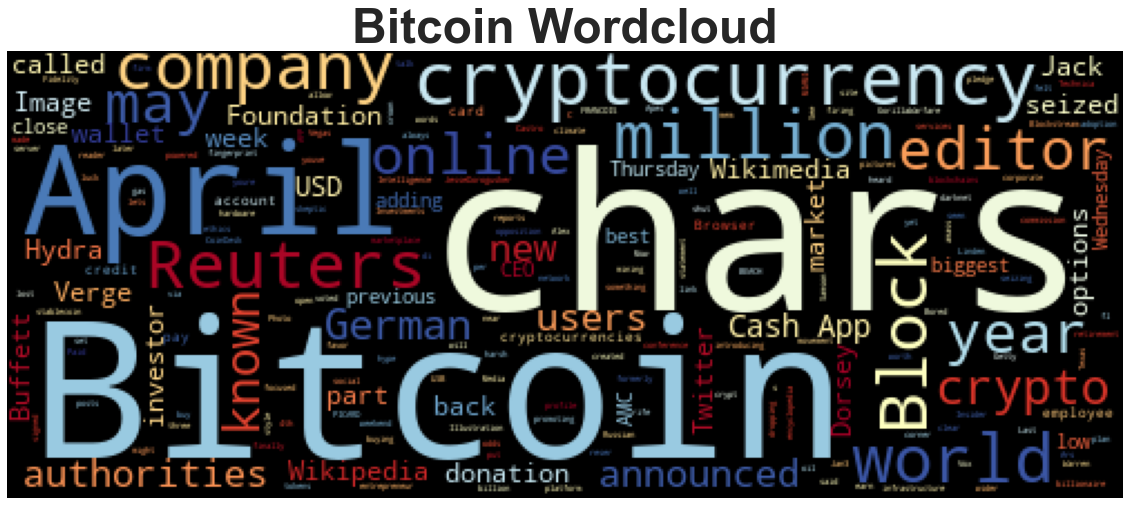

In [27]:
wordcloud(btc.text.str.cat(), title = "Bitcoin Wordcloud")

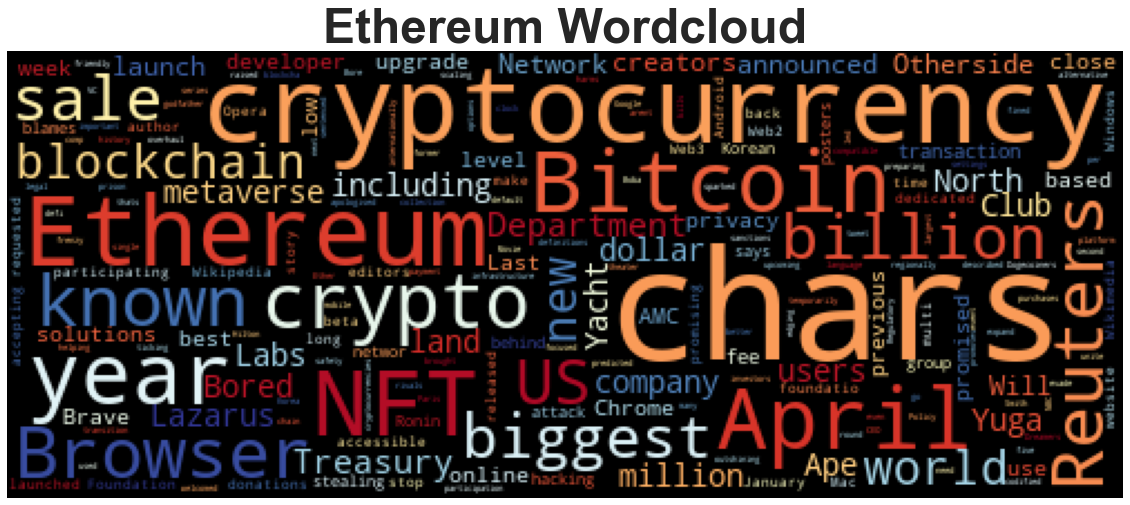

In [28]:
# Generate the Ethereum word cloud
wordcloud(eth.text.str.cat(), title = "Ethereum Wordcloud")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [29]:
import spacy
from spacy import displacy

In [30]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2022-05-05 14:04:08.698357: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-05-05 14:04:08.698415: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [31]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [32]:
# Concatenate all of the Bitcoin text together
bitcoin_text = btc.text.str.cat()

In [33]:
# Run the NER processor on all of the text
bitcoin_alltext = nlp(bitcoin_text)

# Add a title to the document
bitcoin_alltext.user_data["title"] = "BTC NER"

In [34]:
# Render the visualization
displacy.render(bitcoin_alltext, style = "ent", jupyter = True)

In [35]:
# List all Entities
for ent in bitcoin_alltext.ents:
    print(ent.text, ent.label_)

Linden GPE
Texas GPE
April 4th DATE
2022 DATE
FRANCOIS PICARD/AFP ORG
Getty Images ORG
later this year DATE
Verge LAW
Vox Media ORG
Alex Castro PERSON
Verge ORG
the Wikimedia Foundation's ORG
Ars Technica PERSON
GorillaWarfare ORG
Buffett PERSON
the weekend DATE
Buffett PERSON
Twitter PRODUCT
Bored Apes PERSON
Bitcoin PERSON
USB-C ORG
Twitter PRODUCT
Jack Dorsey’s PERSON
$25.2 million MONEY
Bitcoin GPE
German NORP
Russian NORP
Hydra GPE
23 million CARDINAL
Last week DATE
Fidelity Investments ORG
chars]April 12 DATE
Reuters ORG
$10 billion MONEY
BEACH GPE
April 7 DATE
Reuters ORG
Samson Mow PERSON
Thursday DATE
Jan3 ORG
Jack Dorsey PERSON
three CARDINAL
Cash App PERSON
Bitcoin 2022 DATE
Thursday DATE
CoinDesk ORG
Intelligence ORG
Cash App PERSON
15 CARDINAL
More than 200 CARDINAL
Wikipedia ORG
the Wikimedia Foundation ORG
chars]April 26 DATE
Reuters ORG
5.1% PERCENT
38,391.36 MONEY
Tuesday DATE
2,229.82 MONEY
Bitcoin PERSON
16% PERCENT
year DATE
+339 ORG
Reuters ORG
5.7% PERCENT
39,862.

---

### Ethereum NER

In [36]:
# Concatenate all of the Ethereum text together
ethereum_text = eth.text.str.cat()

In [37]:
# Run the NER processor on all of the text
ether_alltext = nlp(ethereum_text)

# Add a title to the document
ether_alltext.user_data["title"] = "ETH NER"

In [38]:
# Render the visualization
displacy.render(ether_alltext, style = "ent", jupyter = True)

In [39]:
# List all Entities
for ent in ether_alltext.ents:
    print(ent.text, ent.label_)

The US Department of Treasury ORG
Lazarus PERSON
The US Treasury Department ORG
North Korean NORP
Lazarus ORG
$625 million MONEY
Ronin PERSON
15 CARDINAL
More than 200 CARDINAL
Wikipedia ORG
the Wikimedia Foundation ORG
Crypto Browser PERSON
January DATE
Windows, Mac ORG
Android ORG
Ethereum ORG
Yuga Labs PERSON
Bored Ape Yacht Club PERSON
Yuga Labs PERSON
Otherside ORG
April 30 DATE
NFT ORG
chars]April 5 DATE
Reuters ORG
Boba Network PERSON
$45 million MONEY
Will Smith-led PERSON
Dreamers VC ORG
Paris Hilton PERSON
Ethereum ORG
more than five years DATE
100,000 MONEY
North Korea GPE
US GPE
NBC News ORG
Reuters ORG
No.2 DATE
second ORDINAL
Chrome ORG
Brave ORG
AMC ORG
April 15 DATE
AMC ORG
Adam Aron PERSON
moviego GPE
the "Bored Apes Yacht Club LAW
Last night TIME
Bloomberg PERSON
nearly a third CARDINAL
a billion dollars MONEY
this week DATE
the Ukrainian Computer Emergency Response Team ORG
Slovakian NORP
Russia GPE
GRU Sandworm PERSON
Ethereum ORG
Merge ORG
a few months after June D

---